In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


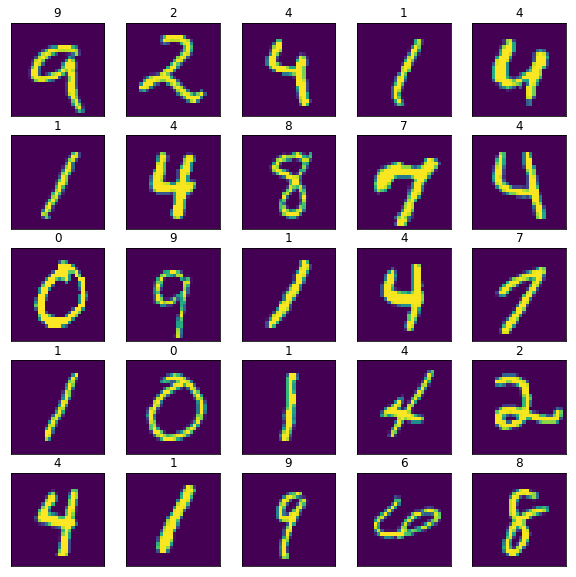

In [3]:
images = mnist.train.images.reshape(-1, 28, 28)
labels = mnist.train.labels

shuffle = np.random.permutation(images.shape[0])

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    index = shuffle[i]
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[index])
    ax.set_title(labels[index])

plt.show()

In [4]:
train_x_data = mnist.train.images
train_y_data = mnist.train.labels

test_x_data = mnist.test.images
test_y_data = mnist.test.labels

test_images = mnist.test.images.reshape(-1, 28, 28)

In [5]:
def batch(data, index, size):
    offset = index * size
    return data[offset:offset + size]

batch_size = 500
num_batches = train_x_data.shape[0] // batch_size

train_x_data.shape[0], batch_size, num_batches

(55000, 500, 110)

In [6]:
train_x_batches = [batch(train_x_data, i, batch_size) for i in range(num_batches)]
train_y_batches = [batch(train_y_data, i, batch_size) for i in range(num_batches)]

In [7]:
np.eye(10)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [8]:
def onehot(data):
    return np.eye(10)[data]

onehot([0, 9, 1, 8])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [9]:
def print_accuracy():
    predict = session.run(label, feed_dict=test_data)
    correct = predict == test_y_data
    print('accuracy = %f' % np.mean(correct))

In [10]:
def draw():
    predict = session.run(label, feed_dict=test_data)
    correct = predict == test_y_data

    shuffle = np.arange(correct.shape[0])[~correct]
    np.random.shuffle(shuffle)

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        if i < len(shuffle):
            index = shuffle[i]
            ax.imshow(test_images[index].reshape(28, 28))
            ax.set_title('P={}, R={}'.format(predict[index], test_y_data[index]))

    plt.show()

In [11]:
# 1층

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.truncated_normal([28 * 28, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u = tf.matmul(x, w) + b
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

1
accuracy = 0.812200
----------------------------------
2
accuracy = 0.856700
----------------------------------
3
accuracy = 0.872600
----------------------------------
4
accuracy = 0.881800
----------------------------------
5
accuracy = 0.887800
----------------------------------
6
accuracy = 0.894200
----------------------------------
7
accuracy = 0.897500
----------------------------------
8
accuracy = 0.899600
----------------------------------
9
accuracy = 0.901700
----------------------------------
10
accuracy = 0.903600
----------------------------------
11
accuracy = 0.904700
----------------------------------
12
accuracy = 0.905700
----------------------------------
13
accuracy = 0.907100
----------------------------------
14
accuracy = 0.907600
----------------------------------
15
accuracy = 0.908100
----------------------------------
16
accuracy = 0.909200
----------------------------------
17
accuracy = 0.910000
----------------------------------
18
accuracy = 0.910400


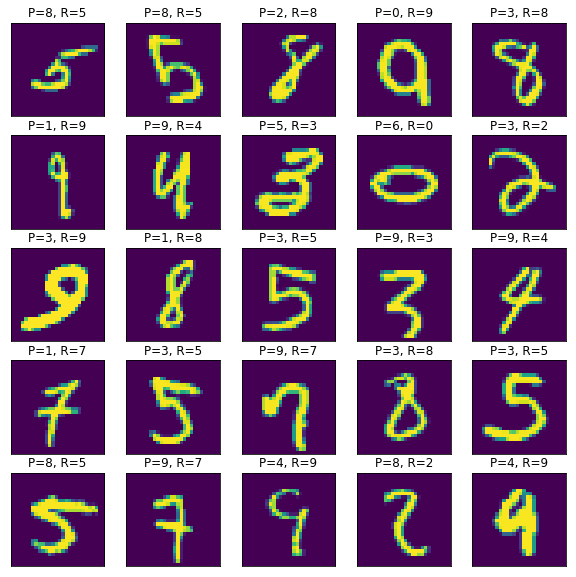

In [12]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data
}

for i in range(50):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index])
        }
        session.run(train, feed_dict=data)
    print_accuracy()
    print('----------------------------------')

draw()

In [13]:
# 2층

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

def f(x, in_size, out_size):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.matmul(x, w) + b

# Hidden Layer

h_u = f(x, 28 * 28, 200)
h_z = tf.nn.relu(h_u)

# Output Layer

u = f(h_z, 200, 10)
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

1
accuracy = 0.853200
----------------------------------
2
accuracy = 0.882200
----------------------------------
3
accuracy = 0.897700
----------------------------------
4
accuracy = 0.906400
----------------------------------
5
accuracy = 0.911800
----------------------------------
6
accuracy = 0.915100
----------------------------------
7
accuracy = 0.918900
----------------------------------
8
accuracy = 0.921700
----------------------------------
9
accuracy = 0.924000
----------------------------------
10
accuracy = 0.925700
----------------------------------
11
accuracy = 0.928100
----------------------------------
12
accuracy = 0.929300
----------------------------------
13
accuracy = 0.930900
----------------------------------
14
accuracy = 0.932200
----------------------------------
15
accuracy = 0.933500
----------------------------------
16
accuracy = 0.935100
----------------------------------
17
accuracy = 0.936800
----------------------------------
18
accuracy = 0.937700


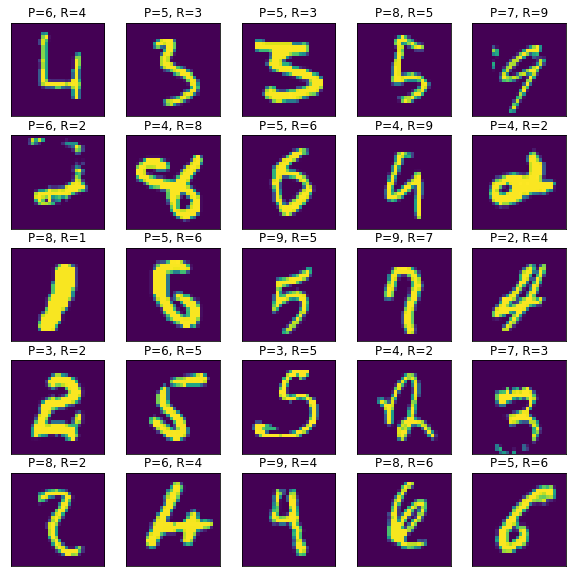

In [14]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data
}

for i in range(50):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index])
        }
        session.run(train, feed_dict=data)
    print_accuracy()
    print('----------------------------------')

draw()

In [15]:
# 5층

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

def f(x, in_size, out_size):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.matmul(x, w) + b

# Hidden Layers

h_z = tf.nn.relu(f(x, 28 * 28, 200), name='layer-0')

for i in range(3):
    h_z = tf.nn.relu(f(h_z, 200, 200), name='layer-{}'.format(i))

# Output Layer

u = f(h_z, 200, 10)
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

1
accuracy = 0.869900
----------------------------------
2
accuracy = 0.907400
----------------------------------
3
accuracy = 0.922800
----------------------------------
4
accuracy = 0.933100
----------------------------------
5
accuracy = 0.939000
----------------------------------
6
accuracy = 0.944500
----------------------------------
7
accuracy = 0.948500
----------------------------------
8
accuracy = 0.951300
----------------------------------
9
accuracy = 0.954200
----------------------------------
10
accuracy = 0.956400
----------------------------------
11
accuracy = 0.958000
----------------------------------
12
accuracy = 0.960100
----------------------------------
13
accuracy = 0.961400
----------------------------------
14
accuracy = 0.963000
----------------------------------
15
accuracy = 0.964400
----------------------------------
16
accuracy = 0.965900
----------------------------------
17
accuracy = 0.966600
----------------------------------
18
accuracy = 0.967200


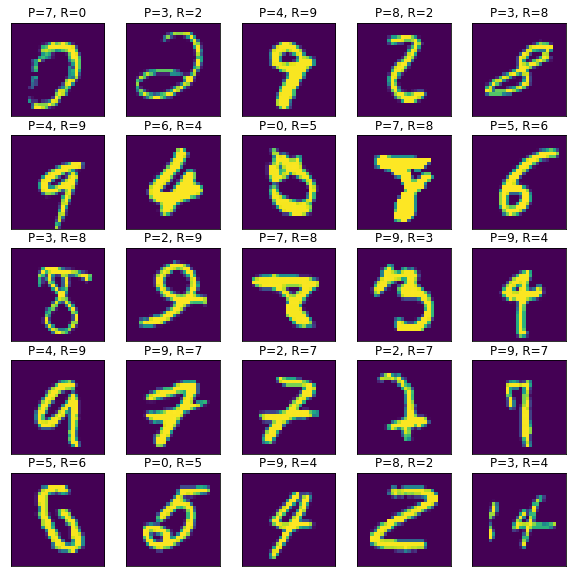

In [16]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data
}

for i in range(50):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index])
        }
        session.run(train, feed_dict=data)
    print_accuracy()
    print('----------------------------------')

draw()

In [17]:
# 제대로 된 이미지 인식

# CNN

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

xx = tf.reshape(x, [-1, 28, 28, 1])

def conv(x, in_ch, out_ch):
    w = tf.Variable(tf.truncated_normal([5, 5, in_ch, out_ch], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_ch], stddev=0.1))
    u = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') + b
    return tf.nn.relu(u)

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def f(x, in_size, out_size):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.matmul(x, w) + b

# Convolution & Polling Layer

z1 = conv(xx, 1, 8)
z2 = pool(z1)

z3 = conv(z2, 8, 16)
z4 = pool(z3)

# Fully Connected

fc_size = (28 // 4) * (28 // 4) * 16
fc_z = tf.reshape(z4, [-1, fc_size])

# Hidden Layer

h_u = f(fc_z, fc_size, 1000)
h_z = tf.nn.relu(h_u)

# Dropout

drop = tf.nn.dropout(h_z, keep_prob)

# Output Layer

u = f(h_z, 1000, 10)
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

In [18]:
xx.shape, z2.shape, z4.shape, h_z.shape, z.shape

(TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]),
 TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(8)]),
 TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(16)]),
 TensorShape([Dimension(None), Dimension(1000)]),
 TensorShape([Dimension(None), Dimension(10)]))

1
accuracy = 0.963600
----------------------------------
2
accuracy = 0.974200
----------------------------------
3
accuracy = 0.981600
----------------------------------
4
accuracy = 0.981900
----------------------------------
5
accuracy = 0.981100
----------------------------------
6
accuracy = 0.981600
----------------------------------
7
accuracy = 0.985300
----------------------------------
8
accuracy = 0.987000
----------------------------------
9
accuracy = 0.987500
----------------------------------
10
accuracy = 0.985300
----------------------------------
11
accuracy = 0.985900
----------------------------------
12
accuracy = 0.986900
----------------------------------
13
accuracy = 0.986500
----------------------------------
14
accuracy = 0.987200
----------------------------------
15
accuracy = 0.986200
----------------------------------
16
accuracy = 0.987100
----------------------------------
17
accuracy = 0.985700
----------------------------------
18
accuracy = 0.985400


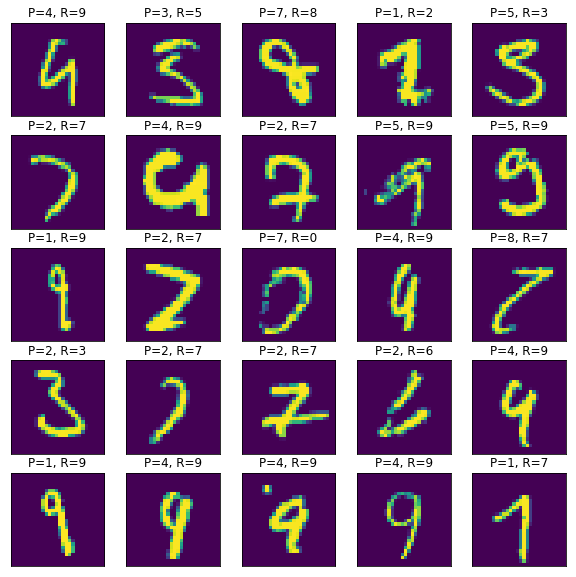

In [19]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data,
    keep_prob: 1.0
}

for i in range(20):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index]),
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    print_accuracy()
    print('----------------------------------')

draw()

In [20]:
# RNN을 하기 전에 준비운동

In [21]:
m = np.arange(2 * 3 * 4).reshape(4, 3, 2)
m

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [22]:
x = tf.constant(m)

for i in range(x.shape.ndims):
    print(i)
    y = tf.unstack(x, x.shape[i], axis=i)
    print(y)
    print(session.run(y))
    print('---------------------------')

0
[<tf.Tensor 'unstack:0' shape=(3, 2) dtype=int64>, <tf.Tensor 'unstack:1' shape=(3, 2) dtype=int64>, <tf.Tensor 'unstack:2' shape=(3, 2) dtype=int64>, <tf.Tensor 'unstack:3' shape=(3, 2) dtype=int64>]
[array([[0, 1],
       [2, 3],
       [4, 5]]), array([[ 6,  7],
       [ 8,  9],
       [10, 11]]), array([[12, 13],
       [14, 15],
       [16, 17]]), array([[18, 19],
       [20, 21],
       [22, 23]])]
---------------------------
1
[<tf.Tensor 'unstack_1:0' shape=(4, 2) dtype=int64>, <tf.Tensor 'unstack_1:1' shape=(4, 2) dtype=int64>, <tf.Tensor 'unstack_1:2' shape=(4, 2) dtype=int64>]
[array([[ 0,  1],
       [ 6,  7],
       [12, 13],
       [18, 19]]), array([[ 2,  3],
       [ 8,  9],
       [14, 15],
       [20, 21]]), array([[ 4,  5],
       [10, 11],
       [16, 17],
       [22, 23]])]
---------------------------
2
[<tf.Tensor 'unstack_2:0' shape=(4, 3) dtype=int64>, <tf.Tensor 'unstack_2:1' shape=(4, 3) dtype=int64>]
[array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14

In [23]:
# RNN

from tensorflow.contrib.rnn import BasicLSTMCell, static_rnn

tf.reset_default_graph()

num_units = 100

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

xx = tf.reshape(x, [-1, 28, 28])

def f(x, in_size, out_size):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.matmul(x, w) + b

inputs = tf.unstack(xx, xx.shape[1], axis=1)

cell = BasicLSTMCell(num_units)
outputs, states = static_rnn(cell, inputs, dtype=tf.float32)

u = f(outputs[-1], num_units, 10)
z = tf.nn.softmax(u)

label = tf.argmax(z, axis=1)

cross_entropy = -tf.reduce_sum(y * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

1
accuracy = 0.809300
----------------------------------
2
accuracy = 0.910700
----------------------------------
3
accuracy = 0.940000
----------------------------------
4
accuracy = 0.949200
----------------------------------
5
accuracy = 0.949900
----------------------------------
6
accuracy = 0.952400
----------------------------------
7
accuracy = 0.956500
----------------------------------
8
accuracy = 0.962300
----------------------------------
9
accuracy = 0.963800
----------------------------------
10
accuracy = 0.961700
----------------------------------
11
accuracy = 0.968700
----------------------------------
12
accuracy = 0.970300
----------------------------------
13
accuracy = 0.971500
----------------------------------
14
accuracy = 0.973300
----------------------------------
15
accuracy = 0.975100
----------------------------------
16
accuracy = 0.973200
----------------------------------
17
accuracy = 0.975300
----------------------------------
18
accuracy = 0.974900


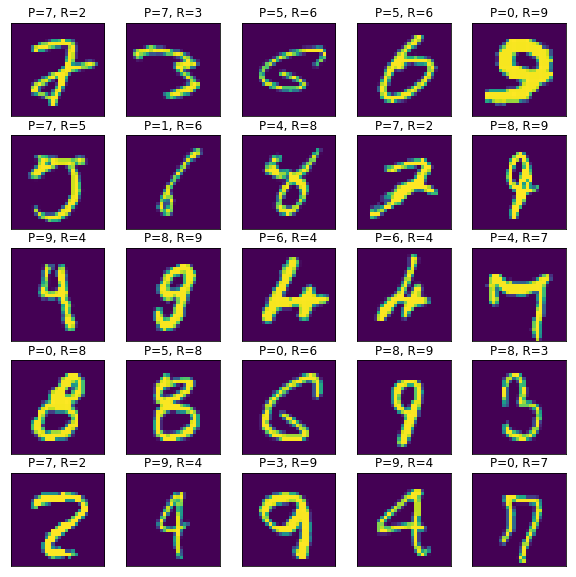

In [24]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: test_x_data
}

for i in range(20):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index],
            y: onehot(train_y_batches[index])
        }
        session.run(train, feed_dict=data)
    print_accuracy()
    print('----------------------------------')

draw()

In [25]:
# 이미지 반쪽으로 전체 완성하기

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 14 * 28])
y = tf.placeholder(tf.float32, [None, 14 * 28])

keep_prob = tf.placeholder(tf.float32)

def f(x, in_size, out_size):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.matmul(x, w) + b

h_u = f(x, 14 * 28, 2000)
h_z = tf.nn.relu(h_u)

drop = tf.nn.dropout(h_z, keep_prob)

u = f(drop, 2000, 14 * 28)
z = tf.nn.sigmoid(u)

cross_entropy = -tf.reduce_sum(y * tf.log(z) + (1 - y) * tf.log(1 - z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

1


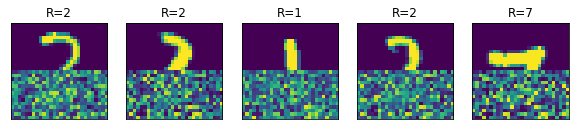

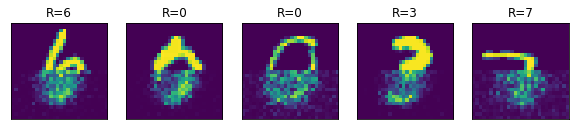

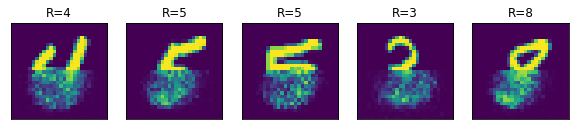

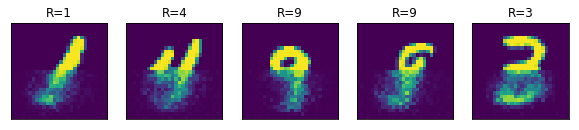

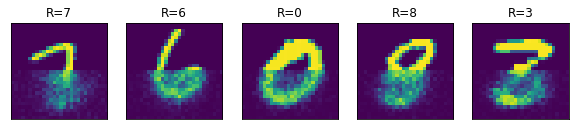

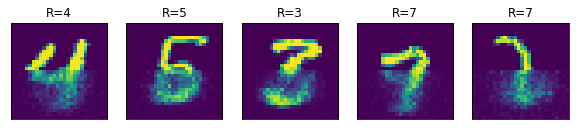

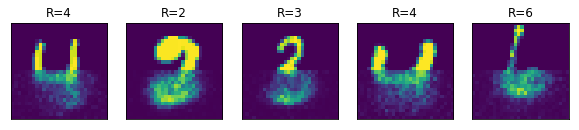

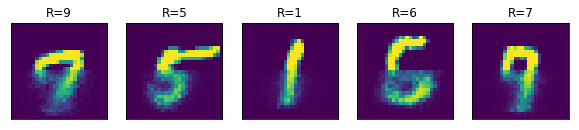

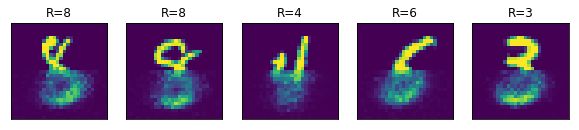

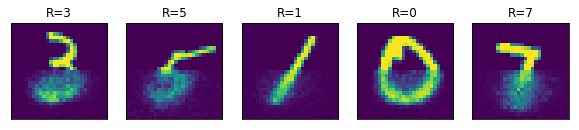

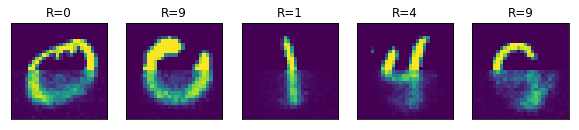

----------------------------------
2


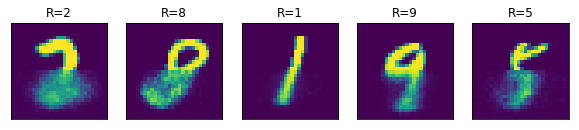

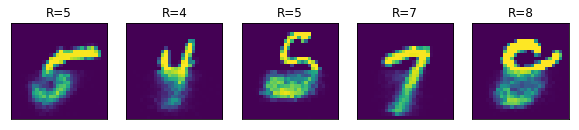

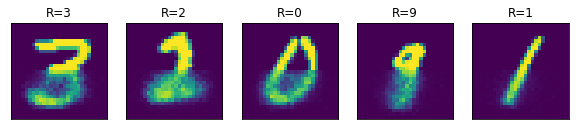

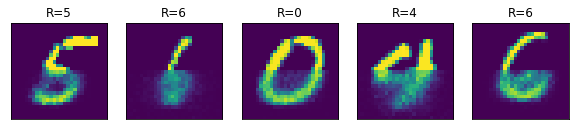

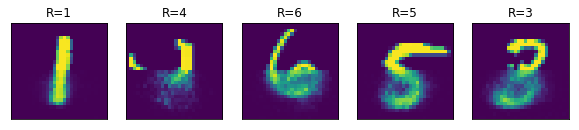

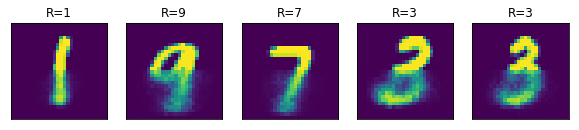

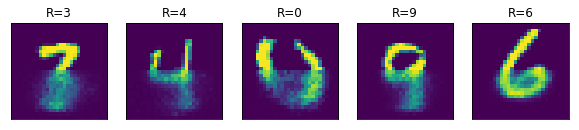

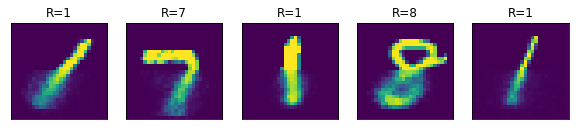

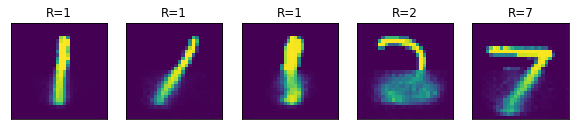

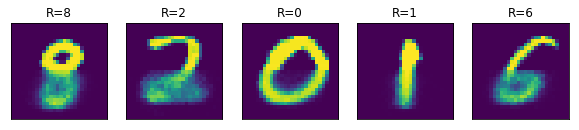

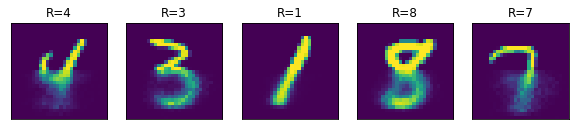

----------------------------------
3


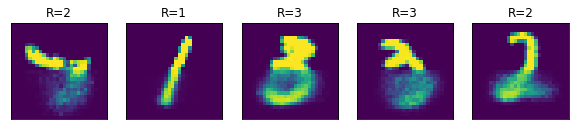

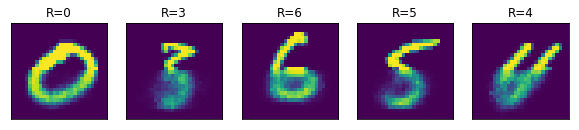

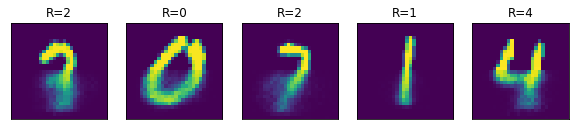

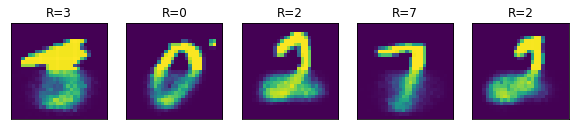

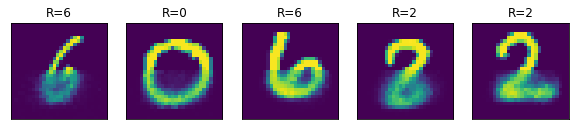

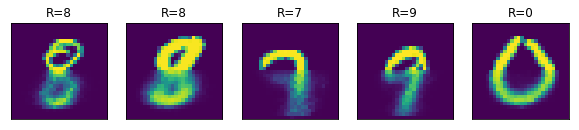

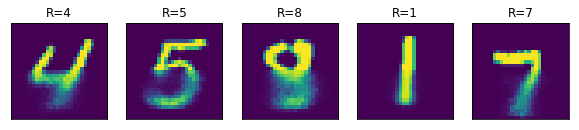

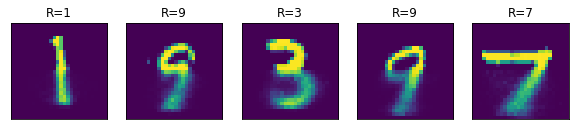

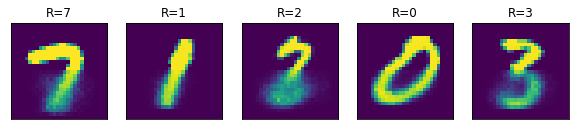

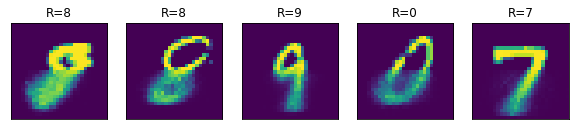

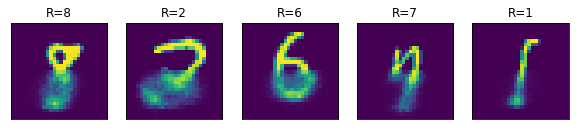

----------------------------------
4


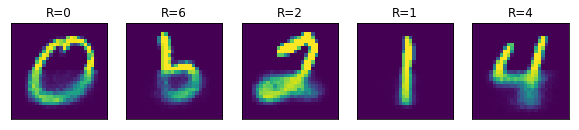

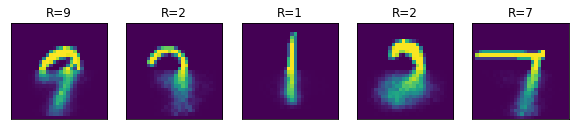

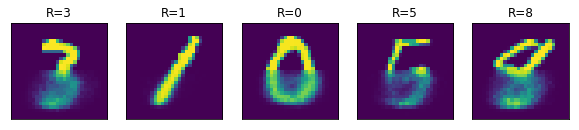

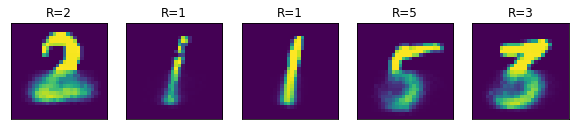

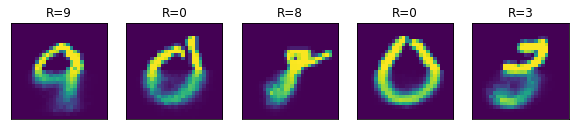

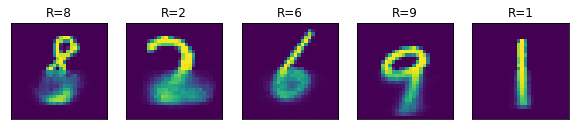

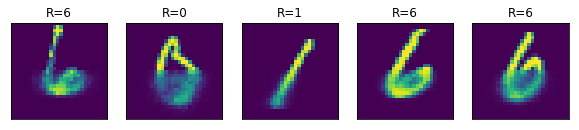

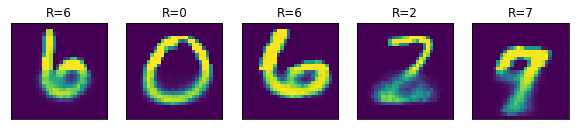

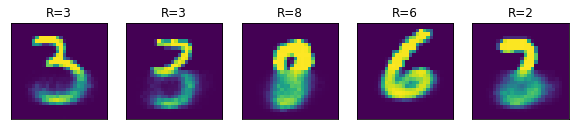

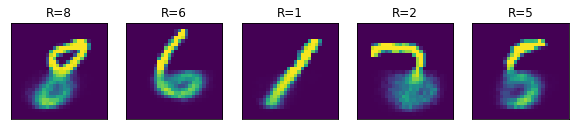

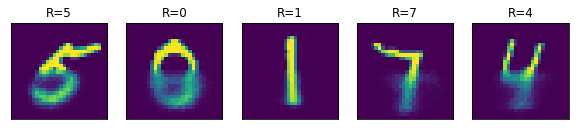

----------------------------------
5


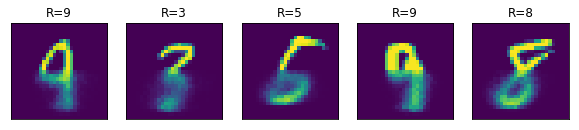

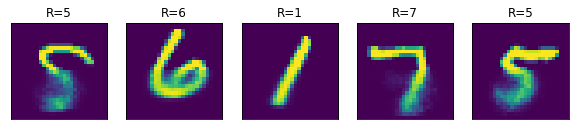

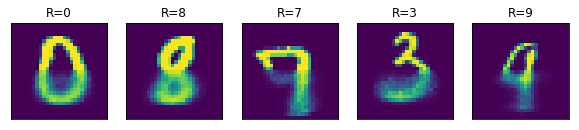

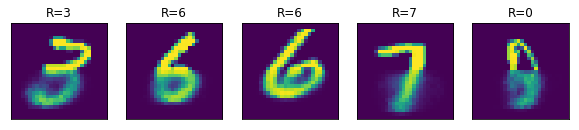

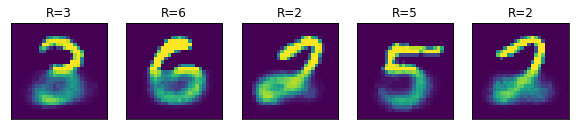

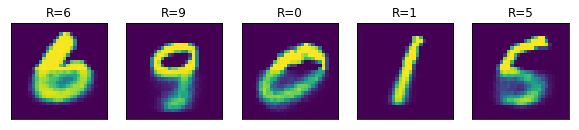

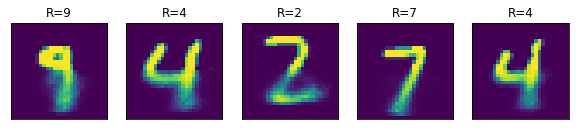

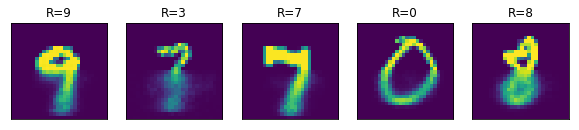

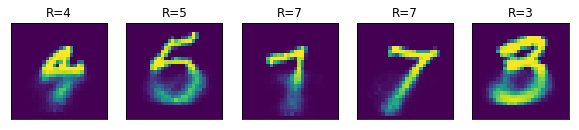

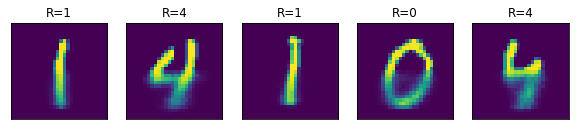

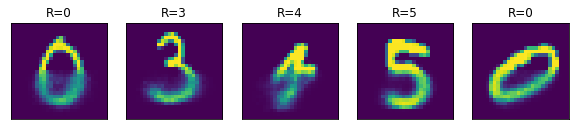

----------------------------------


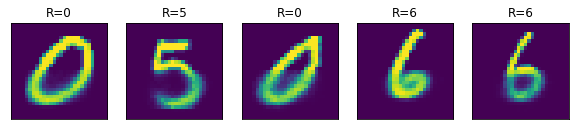

In [26]:
session = tf.Session()
session.run(tf.global_variables_initializer())

def draw():
    shuffle = np.random.permutation(test_x_data.shape[0])

    labels = test_y_data[shuffle][:5]
    images1 = test_x_data[:, :14 * 28][shuffle][:5]
    images2 = session.run(z, feed_dict={ x: images1, keep_prob: 1.0 })

    fig, axes = plt.subplots(1, 5, figsize=(10, 2))

    for i, ax in enumerate(axes.flat):
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        image = np.concatenate([images1[i], images2[i]], axis=0)
        ax.imshow(image.reshape(28, 28))
        ax.set_title('R={}'.format(labels[i]))

    plt.show()

for i in range(5):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index][:, :14 * 28],
            y: train_x_batches[index][:, 14 * 28:],
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
        if index % 10 == 0:
            draw()
    print('----------------------------------')

draw()

In [27]:
# 이미지 반쪽으로 전체 완성하기

# RNN

tf.reset_default_graph()

num_units = 50

x = tf.placeholder(tf.float32, [None, 14 * 28])
y = tf.placeholder(tf.float32, [None, 14 * 28])

keep_prob = tf.placeholder(tf.float32)

xx = tf.reshape(x, [-1, 14, 28])

def f(x, in_size, out_size):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.matmul(x, w) + b

inputs = tf.unstack(xx, xx.shape[1], axis=1)

cell = BasicLSTMCell(num_units)
outputs, states = static_rnn(cell, inputs, dtype=tf.float32)

output = tf.reshape(tf.concat(outputs, axis=1), [-1, num_units * 14])

h_u = f(output, num_units * 14, 2000)
h_z = tf.nn.relu(h_u)

drop = tf.nn.dropout(h_z, keep_prob)

u = f(drop, 2000, 14 * 28)
z = tf.nn.sigmoid(u)

cross_entropy = -tf.reduce_sum(y * tf.log(z) + (1 - y) * tf.log(1 - z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

1


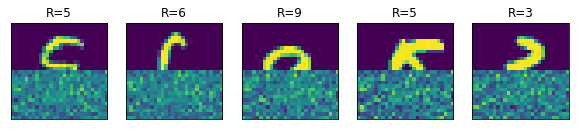

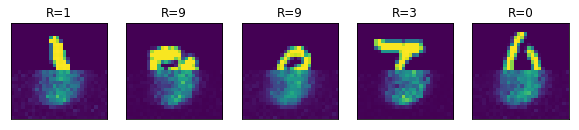

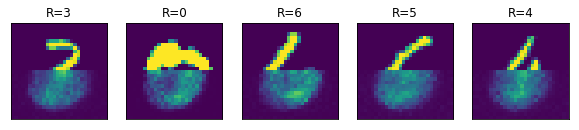

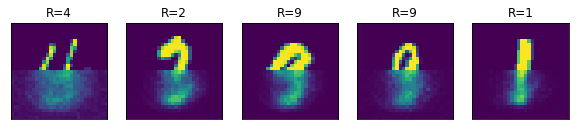

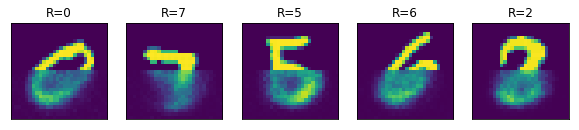

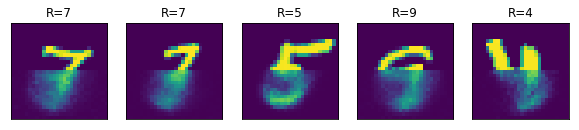

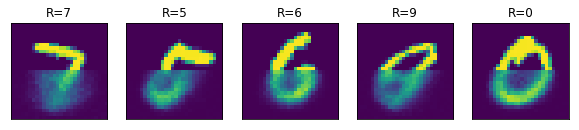

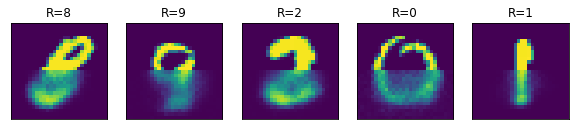

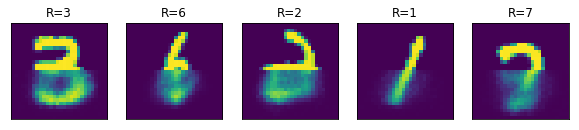

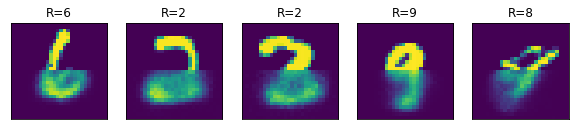

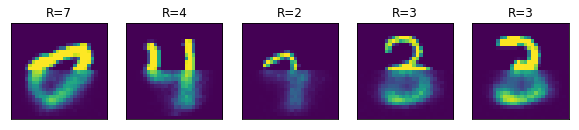

----------------------------------
2


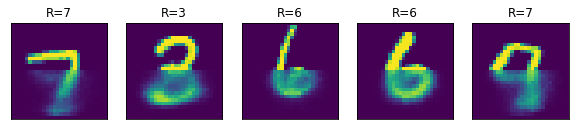

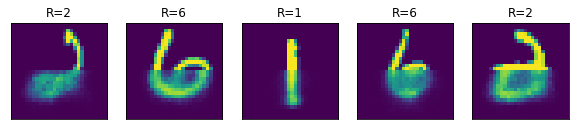

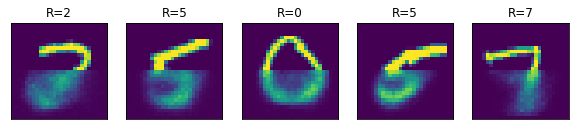

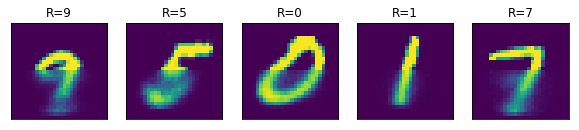

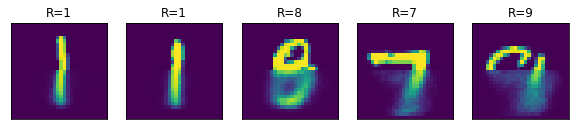

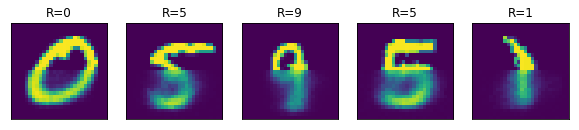

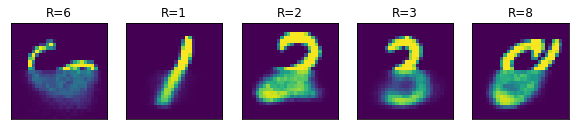

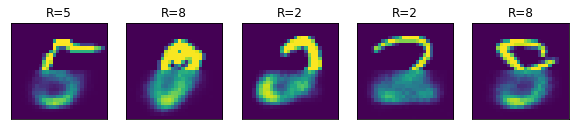

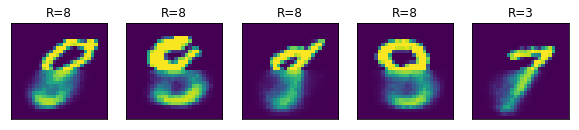

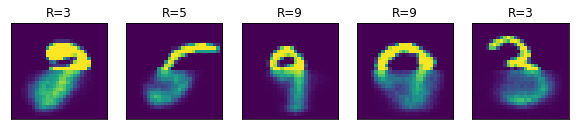

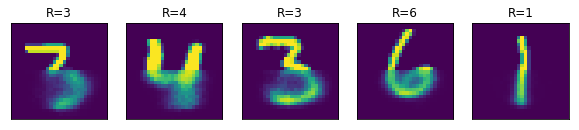

----------------------------------
3


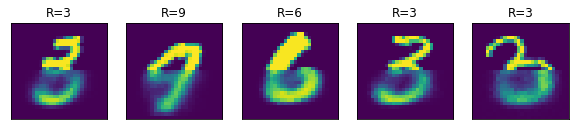

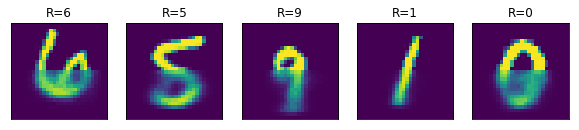

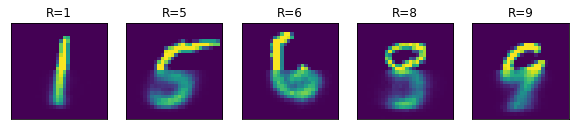

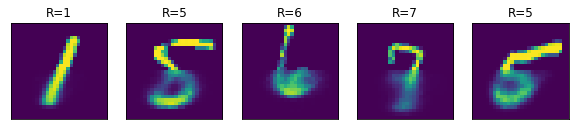

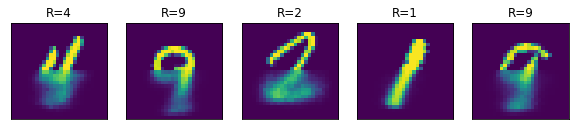

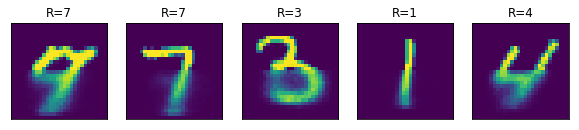

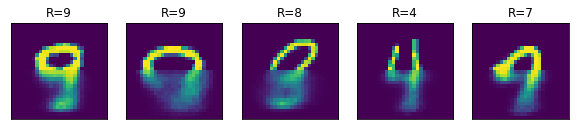

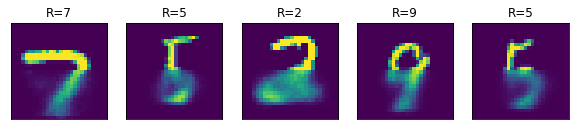

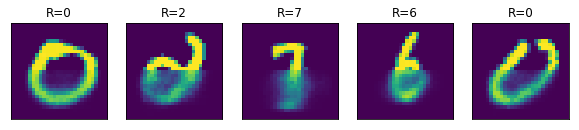

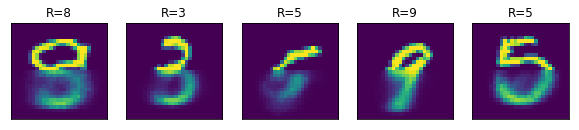

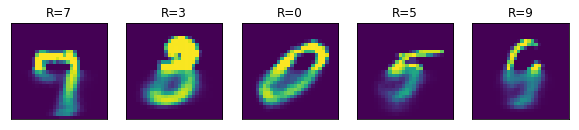

----------------------------------
4


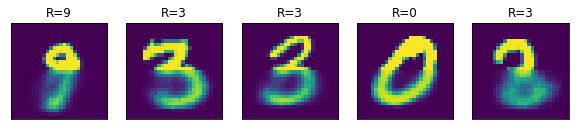

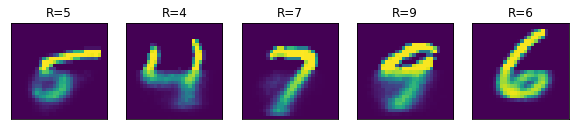

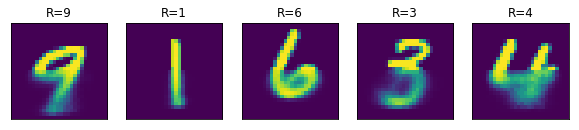

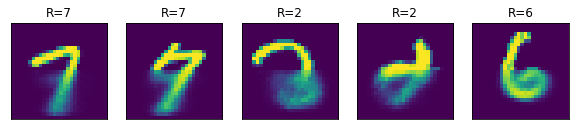

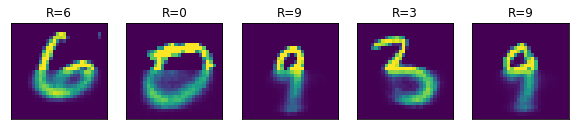

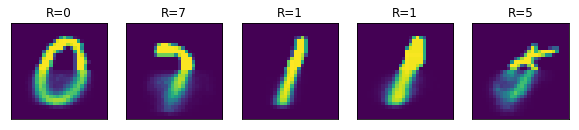

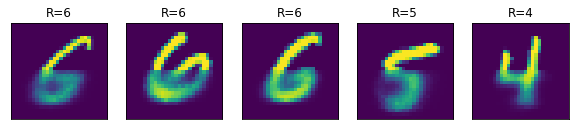

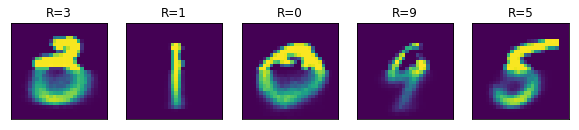

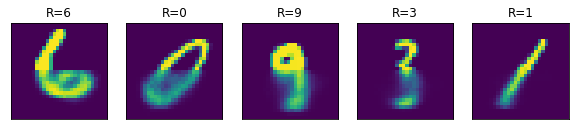

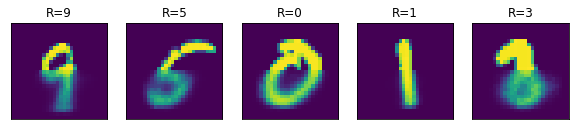

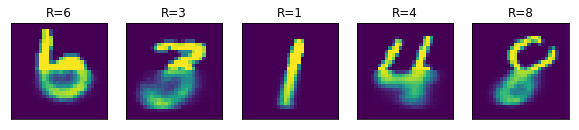

----------------------------------
5


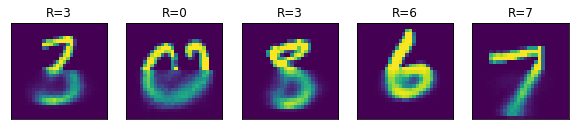

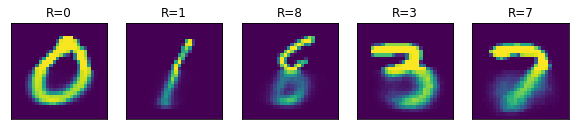

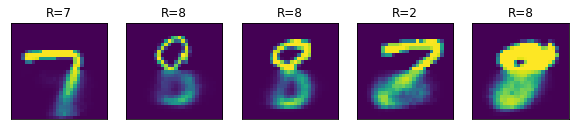

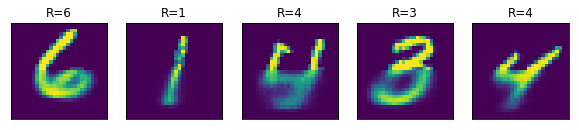

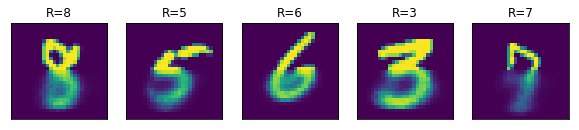

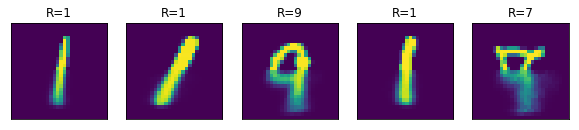

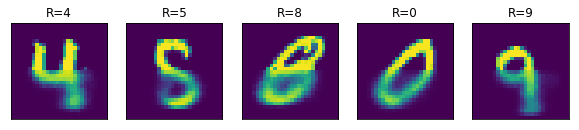

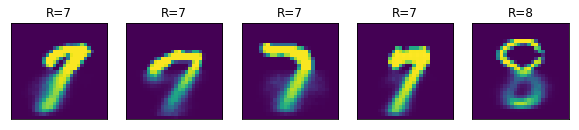

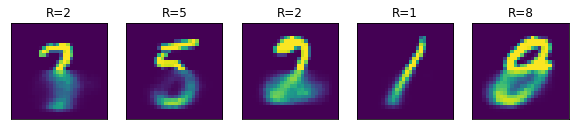

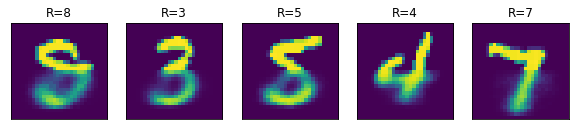

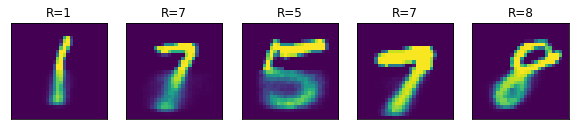

----------------------------------


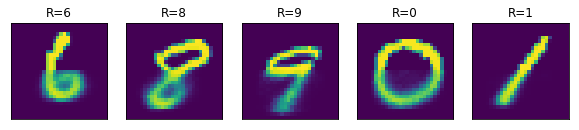

In [28]:
session = tf.Session()
session.run(tf.global_variables_initializer())

for i in range(5):
    print(i + 1)
    for index in range(num_batches):
        data = {
            x: train_x_batches[index][:, :14 * 28],
            y: train_x_batches[index][:, 14 * 28:],
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
        if index % 10 == 0:
            draw()
    print('----------------------------------')

draw()